In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
import sys
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images = []
labels = []
path = '/content/drive/MyDrive/cancerProject/cancer3'
import os

grades = os.listdir(path)

for grade in grades:
    folder_path = os.path.join(path, grade)
    imgs = os.listdir(folder_path)

    for img in imgs:
        folder_path1 = os.path.join(folder_path, img)
        imgs_1=os.listdir(folder_path1)

        for img1 in imgs_1:
          folder_path2 = os.path.join(folder_path1,img1)
          imgs_2 = os.listdir(folder_path2)

          for img2 in imgs_2:
            folder_path3 = os.path.join(folder_path2,img2)
            img_3= os.listdir(folder_path3)

            for img3 in img_3:
              img_path = os.path.join(folder_path3,img3)
              #img_4 = os.listdir(folder_path4)
              images.append(img_path)
              labels.append(grade)


In [ ]:
import pandas as pd
df=pd.DataFrame({'Image_path': images, 'labels': labels})
df.shape

(7909, 2)

In [ ]:
df['labels'].value_counts()

malignant    5429
benign       2480
Name: labels, dtype: int64

In [ ]:
#df['labels'] = df['labels'].rename({'malignant': '1', 'benign': '0'})

In [ ]:
#df['labels'] = df['labels'].astype('object')

In [ ]:
df['labels'].value_counts()

malignant    5429
benign       2480
Name: labels, dtype: int64

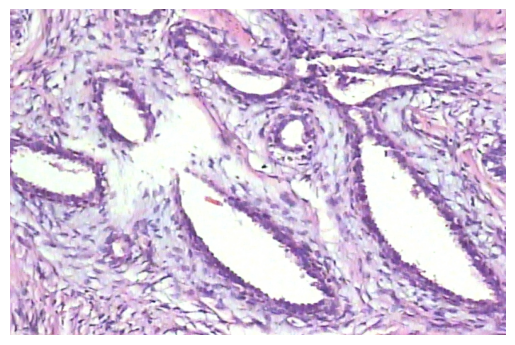

In [ ]:
x  = df['Image_path'][0]


img_path = df['Image_path'][0]

# Load the image using OpenCV
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

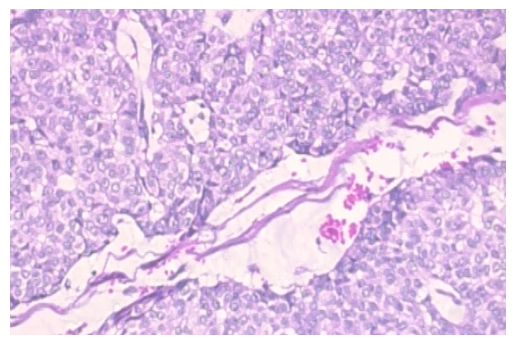

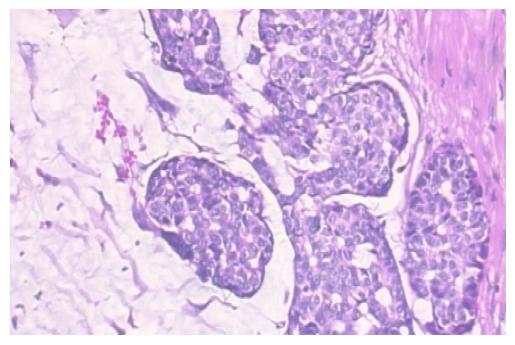

In [ ]:
image_paths = df['Image_path'][0:2]

for img_path in image_paths:
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
df.tail()

,Image_path,labels
7904,/content/drive/MyDrive/projects/cancer3/benign...,benign
7905,/content/drive/MyDrive/projects/cancer3/benign...,benign
7906,/content/drive/MyDrive/projects/cancer3/benign...,benign
7907,/content/drive/MyDrive/projects/cancer3/benign...,benign
7908,/content/drive/MyDrive/projects/cancer3/benign...,benign


In [ ]:
# split dataset to train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:

# Instantiating Generator

import tensorflow as tf

train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range = 40,width_shift_range = 0.2,height_shift_range = 0.2,
                              shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True,fill_mode='nearest')
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)


train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image_path',
    y_col='labels',
    target_size=(244, 244),
    color_mode='rgb',
    class_mode='binary',
    batch_size=50,
    shuffle=True,
    seed=42,
    subset='training'
)


test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image_path',
    y_col='labels',
    target_size=(244, 244),
    color_mode='rgb',
    class_mode='binary',
    batch_size=50,
    shuffle=False
)

Found 6327 validated image filenames belonging to 2 classes.
Found 1582 validated image filenames belonging to 2 classes.


In [ ]:
metrics = [
    tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),
]

In [ ]:
n_classes = 2

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (2, 2), padding='same', activation='relu', input_shape=(244, 244, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(16, (2, 2), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer='adam', metrics= metrics )

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 244, 244, 16)      208       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 122, 122, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 122, 122, 16)      1040      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 61, 61, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        2080      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 32)       

In [ ]:
history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=10)

Epoch 1/10
127/127 [==============================] - 1758s 14s/step - loss: 0.5443 - categorical_accuracy: 0.9731 - precision: 0.7286 - recall: 0.8981 - auc: 0.7451 - val_loss: 0.4872 - val_categorical_accuracy: 1.0000 - val_precision: 0.7901 - val_recall: 0.9615 - val_auc: 0.8206
Epoch 2/10
127/127 [==============================] - 224s 2s/step - loss: 0.4707 - categorical_accuracy: 1.0000 - precision: 0.8169 - recall: 0.9147 - auc: 0.8173 - val_loss: 0.4799 - val_categorical_accuracy: 1.0000 - val_precision: 0.8363 - val_recall: 0.9451 - val_auc: 0.8306
Epoch 3/10
127/127 [==============================] - 223s 2s/step - loss: 0.4413 - categorical_accuracy: 1.0000 - precision: 0.8317 - recall: 0.9255 - auc: 0.8339 - val_loss: 0.4374 - val_categorical_accuracy: 1.0000 - val_precision: 0.8406 - val_recall: 0.9414 - val_auc: 0.8398
Epoch 4/10
127/127 [==============================] - 215s 2s/step - loss: 0.4231 - categorical_accuracy: 1.0000 - precision: 0.8416 - recall: 0.9246 - auc

# visualizing the model

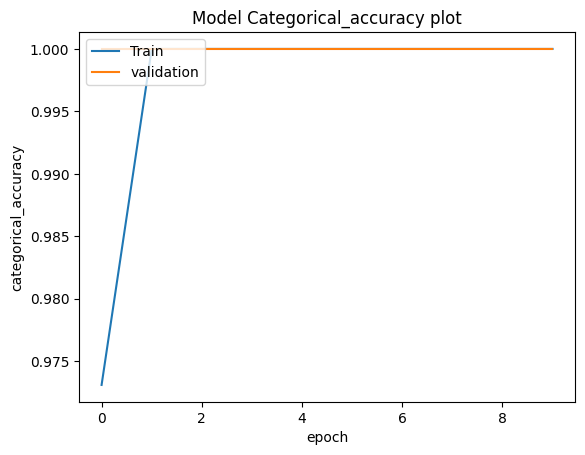

In [ ]:
# summarize history for categorical_accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Categorical_accuracy plot')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

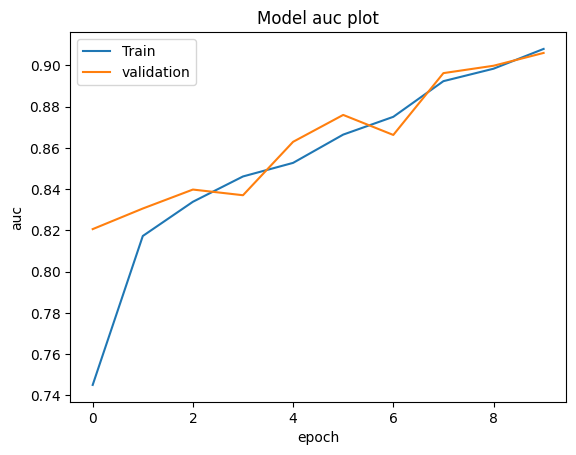

In [ ]:
# summarize history for recall

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model auc plot')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

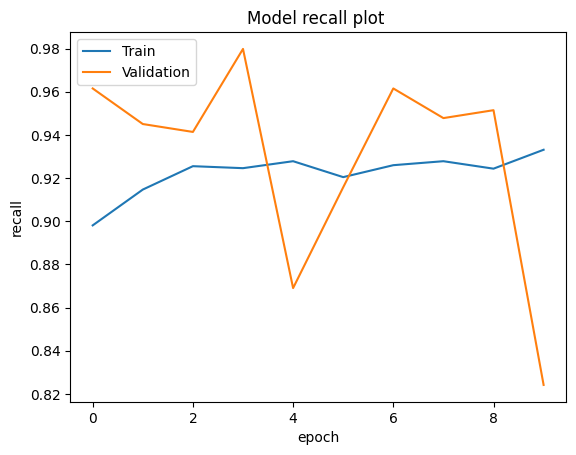

In [ ]:
# summarize history for accuracy
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model recall plot ')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

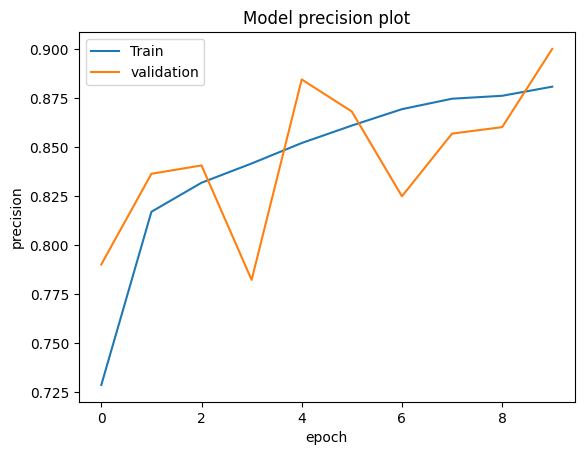

In [ ]:
# summarize history for precision
#plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model precision plot')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

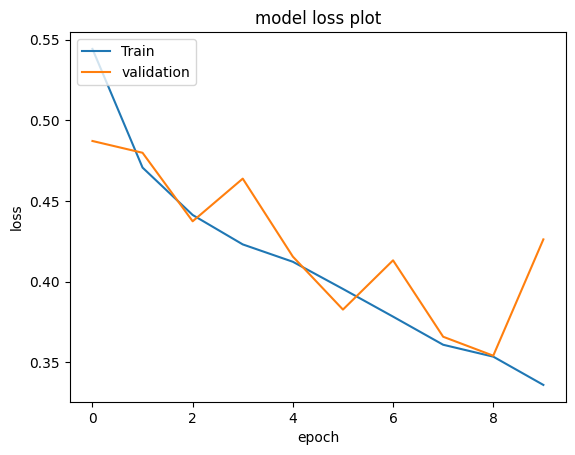

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_auc'])

# Transfer Learning with VGG16


In [ ]:
from tensorflow.keras import models, layers

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
base_model = VGG16(include_top=False,
    weights="imagenet", input_shape=(244,244,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
import tensorflow as tf
n_classes = 1
x1=base_model.output
x1=tf.keras.layers.Flatten()(x1)
x1=tf.keras.layers.Dense(64, activation='relu')(x1)
x1=tf.keras.layers.Dense(128, activation='relu')(x1)
x=tf.keras.layers.Dense(n_classes, activation='sigmoid')(x1)
model=tf.keras.Model(inputs=base_model.input, outputs=x)

In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer='adam', metrics= metrics )

In [ ]:
history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=10)

Epoch 1/10
127/127 [==============================] - 251s 2s/step - loss: 0.5614 - categorical_accuracy: 1.0000 - precision: 0.7678 - recall: 0.8948 - auc: 0.7548 - val_loss: 0.5301 - val_categorical_accuracy: 1.0000 - val_precision: 0.7213 - val_recall: 0.9835 - val_auc: 0.8472
Epoch 2/10
127/127 [==============================] - 222s 2s/step - loss: 0.4257 - categorical_accuracy: 1.0000 - precision: 0.8300 - recall: 0.9110 - auc: 0.8595 - val_loss: 0.4030 - val_categorical_accuracy: 1.0000 - val_precision: 0.8170 - val_recall: 0.9524 - val_auc: 0.8895
Epoch 3/10
127/127 [==============================] - 235s 2s/step - loss: 0.3884 - categorical_accuracy: 1.0000 - precision: 0.8541 - recall: 0.9096 - auc: 0.8835 - val_loss: 0.4178 - val_categorical_accuracy: 1.0000 - val_precision: 0.8173 - val_recall: 0.9505 - val_auc: 0.8867
Epoch 4/10
127/127 [==============================] - 218s 2s/step - loss: 0.3743 - categorical_accuracy: 1.0000 - precision: 0.8645 - recall: 0.9108 - auc: 

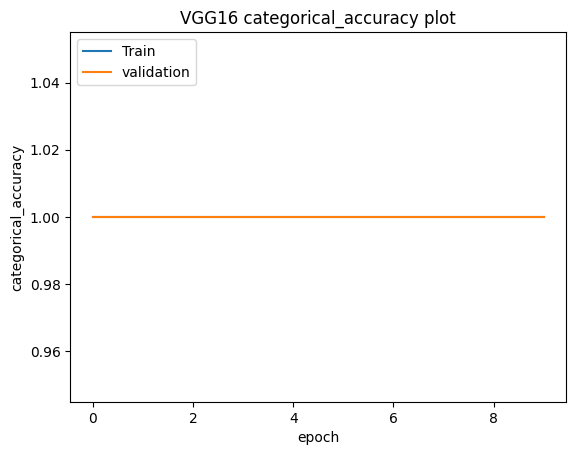

In [ ]:
# summarize history for categorical accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('VGG16 categorical_accuracy plot')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

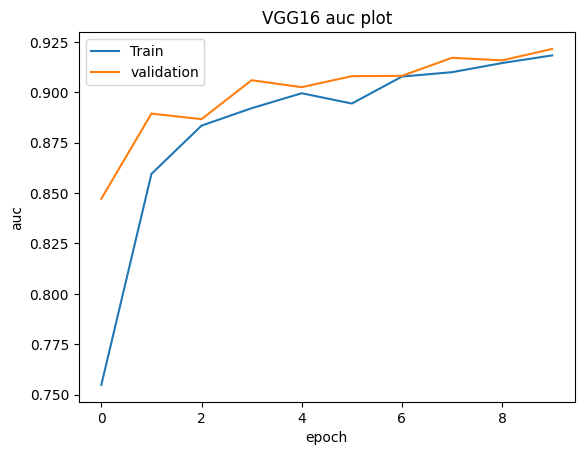

In [ ]:
# summarize history for auc accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('VGG16 auc plot')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

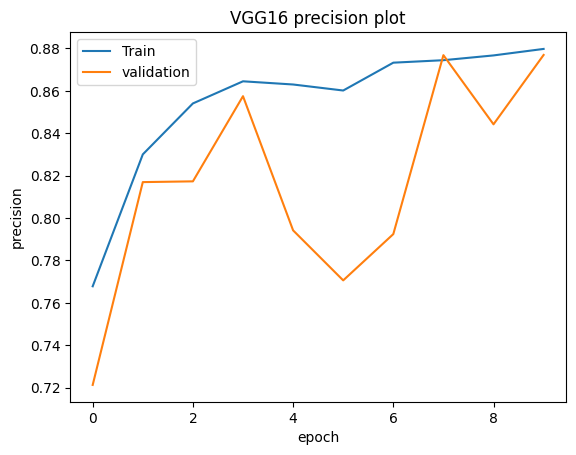

In [ ]:
# plot graph for the precision value
#plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('VGG16 precision plot')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

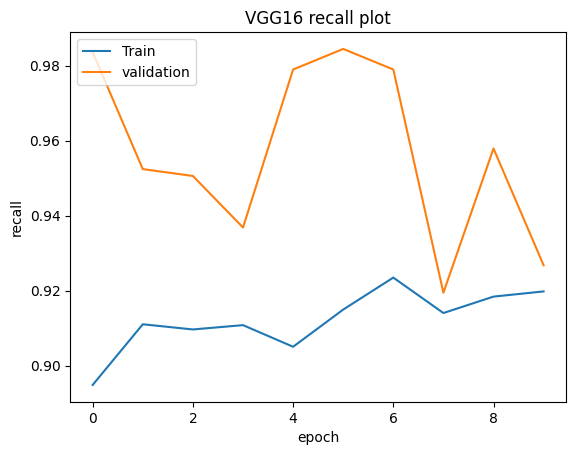

In [ ]:
# summarize history for accuracy
#plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('VGG16 recall plot')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

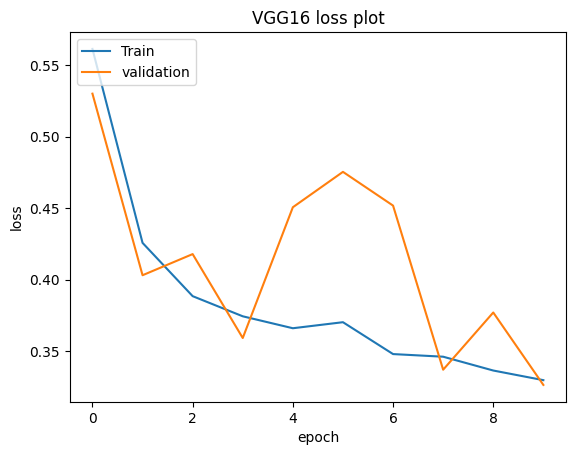

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

# Transfer Learning with VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
base_model1 = VGG19(include_top=False,
    weights="imagenet", input_shape=(244,244,3))

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
base_model1.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [ ]:
for layer in base_model1.layers:
  layer.trainable=False

In [ ]:
import tensorflow as tf
n_classes = 1
x1=base_model1.output
x1=tf.keras.layers.Flatten()(x1)
x1=tf.keras.layers.Dense(64, activation='relu')(x1)
x1=tf.keras.layers.Dense(128, activation='relu')(x1)
x=tf.keras.layers.Dense(n_classes, activation='sigmoid')(x1)
model=tf.keras.Model(inputs=base_model1.input, outputs=x)

In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer='adam', metrics= metrics )

In [ ]:
history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=10)

Epoch 1/10
127/127 [==============================] - 7155s 56s/step - loss: 0.5744 - categorical_accuracy: 1.0000 - precision: 0.7397 - recall: 0.8912 - auc: 0.6930 - val_loss: 0.4681 - val_categorical_accuracy: 1.0000 - val_precision: 0.8049 - val_recall: 0.8956 - val_auc: 0.8323
Epoch 2/10
127/127 [==============================] - 236s 2s/step - loss: 0.4717 - categorical_accuracy: 1.0000 - precision: 0.8012 - recall: 0.8912 - auc: 0.8190 - val_loss: 0.4182 - val_categorical_accuracy: 1.0000 - val_precision: 0.8340 - val_recall: 0.9066 - val_auc: 0.8660
Epoch 3/10
127/127 [==============================] - 234s 2s/step - loss: 0.4376 - categorical_accuracy: 1.0000 - precision: 0.8264 - recall: 0.8923 - auc: 0.8487 - val_loss: 0.4392 - val_categorical_accuracy: 1.0000 - val_precision: 0.7861 - val_recall: 0.9524 - val_auc: 0.8708
Epoch 4/10
127/127 [==============================] - 236s 2s/step - loss: 0.4301 - categorical_accuracy: 1.0000 - precision: 0.8290 - recall: 0.8932 - auc

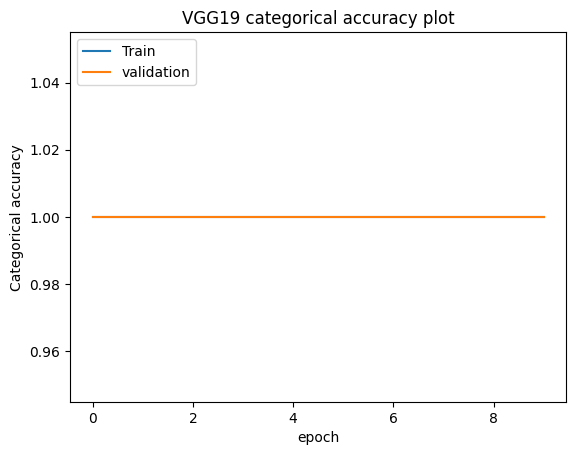

In [ ]:
# summarize history for categorical_accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('VGG19 categorical accuracy plot')
plt.ylabel('Categorical accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

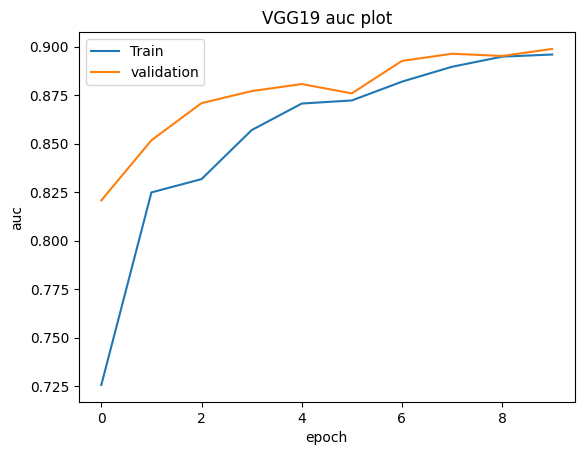

In [ ]:
# summarize history for auc
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('VGG19 auc plot')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

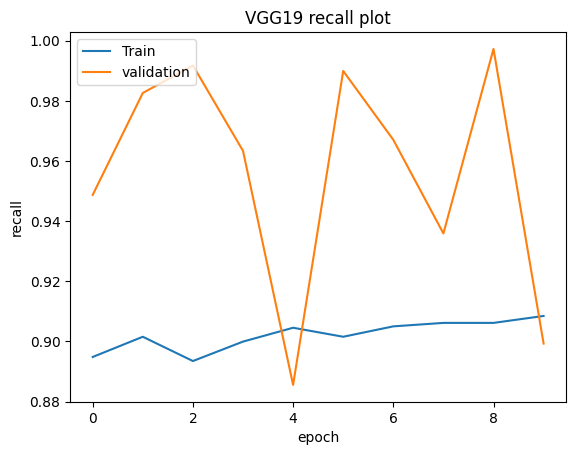

In [ ]:
# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('VGG19 recall plot')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

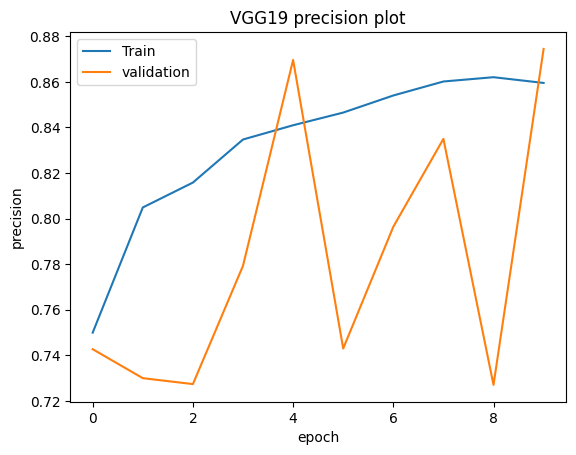

In [ ]:
# summarize history for precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('VGG19 precision plot')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

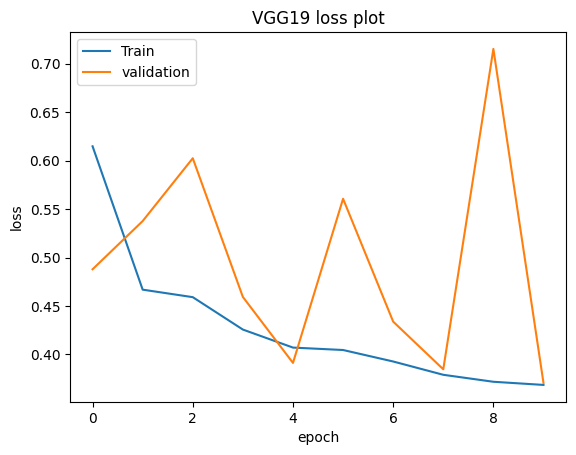

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG19 loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

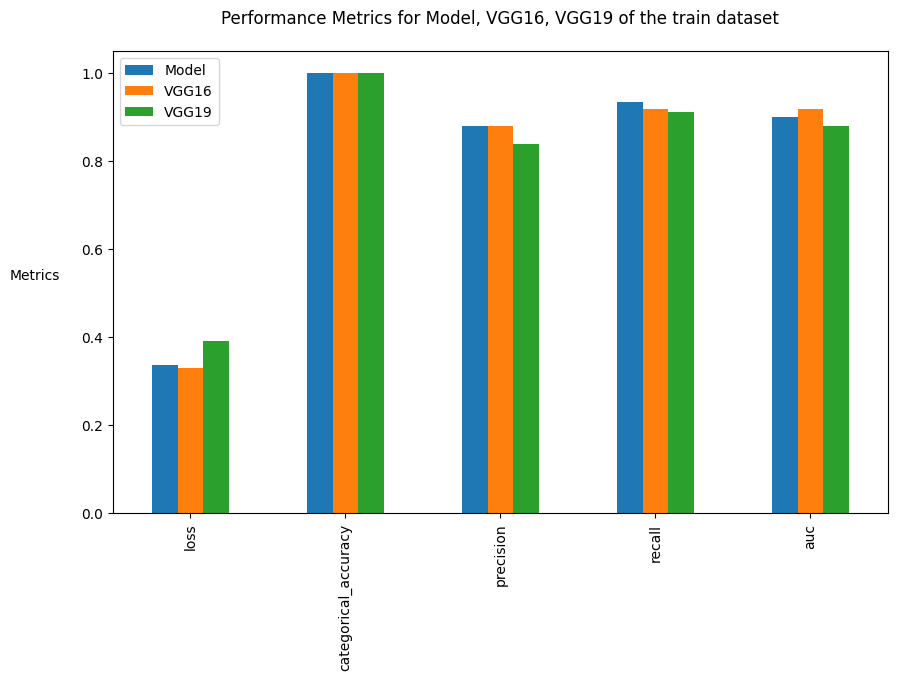

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Given set of values
data = {
    'loss': [0.3359, 0.3296,  0.3909],
    'categorical_accuracy': [1.0000, 1.0000, 1.0000],
    'precision': [0.8807, 0.8798, 0.8391],
    'recall': [0.9331, 0.9184, 0.9103],
    'auc': [0.9000, 0.9184, 0.8806]
}

# Create DataFrame
df = pd.DataFrame(data, index=['Model', 'VGG16', 'VGG19'])

# Transpose the DataFrame for better plotting
df = df.transpose()

# Plotting the bar chart
ax = df.plot(kind='bar', rot=90, figsize=(10, 6))
ax.set_ylabel('Metrics', labelpad=15, rotation=0, ha='right')

ax.set_title('Performance Metrics for Model, VGG16, VGG19 of the train dataset', pad=20)

# Show the plot
plt.show()


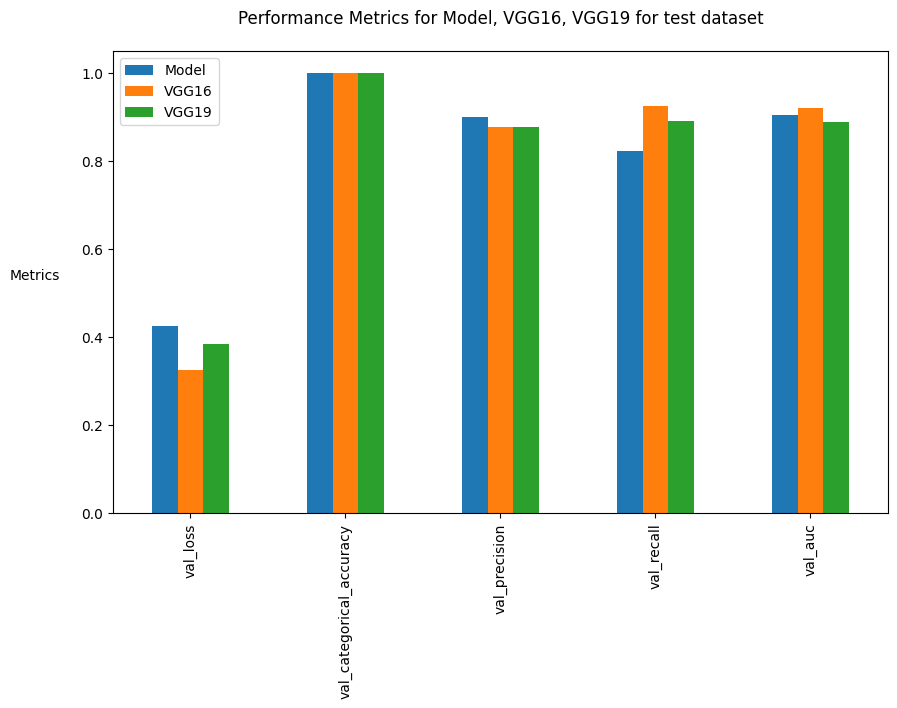

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = {
    'val_loss': [0.4262, 0.3262, 0.3854],
    'val_categorical_accuracy': [1.0000, 1.0000, 1.0000],
    'val_precision': [0.9000, 0.8769, 0.8782],
    'val_recall': [0.8242, 0.9267, 0.8910],
    'val_auc': [0.9060, 0.9216, 0.8902]}



# Create DataFrame
df1 = pd.DataFrame(data1, index=['Model', 'VGG16', 'VGG19'])

# Transpose the DataFrame for better plotting
df1 = df1.transpose()

# Plotting the bar chart
ax = df1.plot(kind='bar', rot=90, figsize=(10, 6))
ax.set_ylabel('Metrics', labelpad=15, rotation=0, ha='right')

ax.set_title('Performance Metrics for Model, VGG16, VGG19 for test dataset', pad=20)

# Show the plot
plt.show()

In [ ]:
df1

,Model,VGG16,VGG19
val_loss,0.4262,0.3262,0.3854
val_categorical_accuracy,1.0000,1.0000,1.0000
val_precision,0.9000,0.8769,0.8782
val_recall,0.8242,0.9267,0.8910
val_auc,0.9060,0.9216,0.8902
